# Fashion Outfit Recommendation System

This notebook implements a system to recommend outfits based on a user's skin tone and preferences. The system involves the following steps:

1. **Dataset Cleaning and Processing**
2. **Skin Tone Classification from Image**
3. **Using Skin Tone to Decide Colors**
4. **Generating and Displaying Outfit Combinations**

---

## 1. Dataset Cleaning and Processing

We clean the dataset and prepare it for filtering based on input features like gender, season, usage, and color.


In [1]:
import pandas as pd
import numpy as np
import random

# Load dataset
dataset_path = '/kaggle/input/hermes/styles.csv'  # Replace with your dataset path
data = pd.read_csv(dataset_path, on_bad_lines='skip')

# Display initial data overview
print("Dataset Overview:")
print(data.head())

# Drop unnecessary columns (if any)
columns_to_keep = ['id', 'gender', 'mastercategory', 'subcategory', 'articletype', 'basecolour', 'season', 'usage']
data = data[columns_to_keep]

# Clean missing values
data.dropna(subset=['gender', 'mastercategory', 'basecolour'], inplace=True)
data['basecolour'] = data['basecolour'].fillna('Unknown')

# Standardize column names
data.columns = [col.strip().lower() for col in data.columns]

# Check unique values for key features
print("\nUnique values in gender:", data['gender'].unique())
print("Unique values in season:", data['season'].unique())
print("Unique values in usage:", data['usage'].unique())


Dataset Overview:
   id gender mastercategory subcategory   articletype basecolour  season  \
0   0  women       footwear  bottomwear  formal shoes  champagne  summer   
1   1  women       footwear  bottomwear  formal shoes      black    fall   
2   2  women       footwear  bottomwear      sneakers      white  winter   
3   3  women       footwear  bottomwear      sneakers      beige  winter   
4   4  women       footwear  bottomwear        sandal      beige  spring   

    usage  
0  casual  
1  casual  
2  sports  
3  sports  
4  casual  

Unique values in gender: ['women' 'men']
Unique values in season: ['summer' 'fall' 'winter' 'spring']
Unique values in usage: ['casual' 'sports']


In [2]:
print("Unique values in usage:", data['basecolour'].unique())

Unique values in usage: ['champagne' 'black' 'white' 'beige' 'blue' 'gray' 'pink']


In [3]:
# Filter Column Values with only specific Values in gender, masterCategory and SubCategory
mc = data['mastercategory'].unique()
sc = data['subcategory'].unique()
g = data['gender'].unique()
s = data['season'].unique()
u=  data['usage'].unique()

print(mc,sc,g,s,u, sep="\n")

['footwear' 'accessories' 'apperal']
['bottomwear' 'topwear']
['women' 'men']
['summer' 'fall' 'winter' 'spring']
['casual' 'sports']


In [4]:
# Filter Column Values with only specific Values in gender
#data = data[data['gender'].isin(["men","women"])]
#data = data[data['mastercategory'].isin(['apparel','footwear'])]
#data = data[~data['usage'].isin([None,'home'])]
#print(data['subcategory'].unique())

In [5]:
data.head(5)

,id,gender,mastercategory,subcategory,articletype,basecolour,season,usage
0,0,women,footwear,bottomwear,formal shoes,champagne,summer,casual
1,1,women,footwear,bottomwear,formal shoes,black,fall,casual
2,2,women,footwear,bottomwear,sneakers,white,winter,sports
3,3,women,footwear,bottomwear,sneakers,beige,winter,sports
4,4,women,footwear,bottomwear,sandal,beige,spring,casual


## 2. Skin Tone Classification from Image

The skin tone classification uses a pre-built function to detect the skin tone from the user's image input.


In [6]:
! pip install stone
! wget "https://m.media-amazon.com/images/M/MV5BOTQzOWJiYjEtZmUxMC00YjA5LTgzNjUtYjMyZTVmZjVmMmZiXkEyXkFqcGc@._V1_FMjpg_UY720_.jpg" -O /content/dhanush.jpg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.0/159.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.8 MB/s eta 0:00:00
--2025-03-12 18:55:49--  https://m.media-amazon.com/images/M/MV5BOTQzOWJiYjEtZmUxMC00YjA5LTgzNjUtYjMyZTVmZjVmMmZiXkEyXkFqcGc@._V1_FMjpg_UY720_.jpg
Resolving m.media-amazon.com (m.media-amazon.com)... 151.101.1.16, 151.101.65.16, 151.101.129.16, ...
Connecting to m.media-amazon.com (m.media-amazon.com)|151.101.1.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31388 (31K) [image/jpeg]
Saving to: ‘/content/dhanush.jpg’

/content/dhanush.jp 100%[===================>]  30.65K  --.-KB/s    in 0.003s  

2025-03-12 18:55:50 (8.77 MB/s) - ‘/content/dhanush.jpg’ saved [31388/31388]



In [7]:
from PIL import Image
from PIL import ImageColor
import cv2
import numpy as np
import cv2
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import stone
from IPython.display import HTML

# Skin tone mapping based on hex colors
skin_tones = {
    "#373028": "Deepest Skin",
    "#422811": "Very Deep",
    "#513B2E": "Deep Brown",
    "#6F503C": "Medium Brown",
    "#81654F": "Tan",
    "#9D7A54": "Light Tan",
    "#BEA07E": "Medium Fair",
    "#E5C8A6": "Light Fair",
    "#E7C1B8": "Warm Fair",
    "#F3DAD6": "Very Fair",
    "#FBF2F3": "Pale",
}

# Function to detect skin tone from an image
def detect_skin_tone(image):
    # Load image and resize for processing
    # image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, (200, 200))
    
    # Get dominant color (simplified for skin tone detection)
    average_color = resized_image.mean(axis=0).mean(axis=0)
    avg_color_hex = "#{:02x}{:02x}{:02x}".format(int(average_color[0]), int(average_color[1]), int(average_color[2]))
    
    # Convert hex colors to RGB for comparison
    avg_color_rgb = np.array(ImageColor.getrgb(avg_color_hex))
    
    # Find the closest skin tone based on Euclidean distance
    closest_tone_hex = min(
        skin_tones.keys(),
        key=lambda hex_code: np.linalg.norm(avg_color_rgb - np.array(ImageColor.getrgb(hex_code)))
    )
    return closest_tone_hex, skin_tones[closest_tone_hex]



In [8]:
# Function to display colored box
def display_box(face, width=200, height=100):
    display(HTML(f'<div style="width:{width}px; height:{height}px; background-color:{face[0]}; border: 2px solid black;">{face[1]}</div>'))

# display_box([detected_tone_hex,detected_tone_name] )

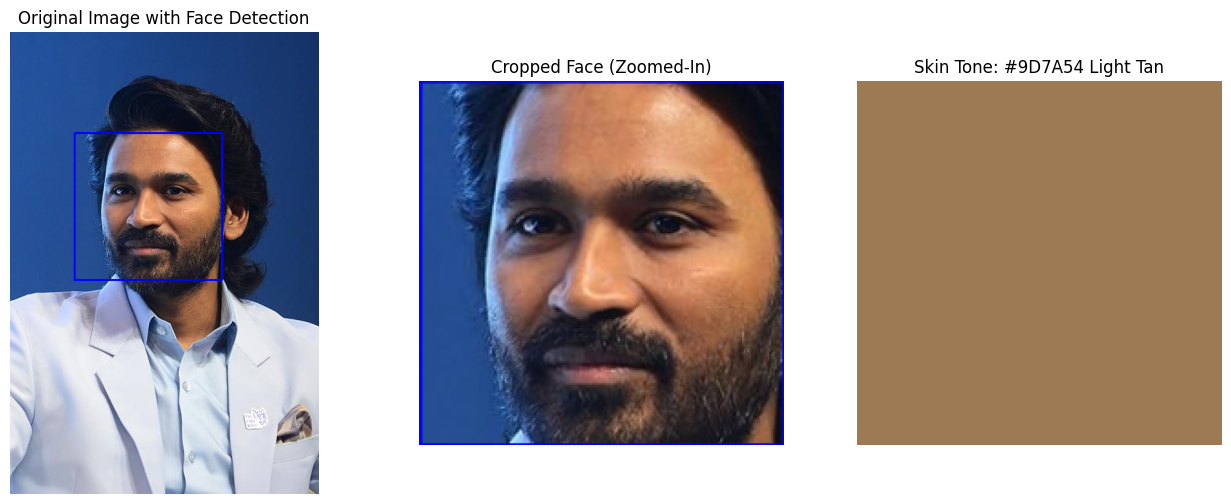

Detected faces: 1


In [9]:

detected_tone_hex = ""
class FaceCropper(object):


    def __init__(self):
        self.face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

    def generate(self, image_path, show_result=True):
        img = cv2.imread(image_path)
        if img is None:
            print("Can't open image file")
            return 0

        # Convert to grayscale for better face detection
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Detect faces in the grayscale image
        faces = self.face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(100, 100))
        if len(faces) == 0:
            print('Failed to detect faces')
            return 0

        if show_result:
            # Draw bounding boxes around the faces on the original image
            for (x, y, w, h) in faces:
                cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

            # Convert the image from BGR to RGB for correct display with matplotlib
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            # Prepare for showing cropped face images
            cropped_faces = []

            # Crop faces and resize them to show as zoomed-in images
            for (x, y, w, h) in faces:
                face_img = img[y:y + h, x:x + w]
                resized_face = cv2.resize(face_img, (200, 200))  # Resize to zoom in
                cropped_faces.append((resized_face, (x, y, w, h)))  # Save cropped face and original position

            # Create a figure with 1 row and 3 columns for side-by-side display
            fig, ax = plt.subplots(1, 3, figsize=(16, 6))

            # Show the original image with bounding boxes in the first column
            ax[0].imshow(img_rgb)
            ax[0].axis('off')  # Hide axes
            ax[0].set_title('Original Image with Face Detection')
            
            # Show the first cropped face in the second column (zoomed-in)
            if cropped_faces:
                zoomed_face, (x, y, w, h) = cropped_faces[0]
                zoomed_face_rgb = cv2.cvtColor(zoomed_face, cv2.COLOR_BGR2RGB)
                global detected_tone_hex

                # Display the zoomed-in face in the second column
                ax[1].imshow(zoomed_face_rgb)
                ax[1].axis('off')  # Hide axes
                ax[1].set_title('Cropped Face (Zoomed-In)')

                # Optional: Draw the bounding box on the zoomed-in face
                rect_x = int((zoomed_face.shape[1] - w) / 2)  # Position the bounding box relative to zoom
                rect_y = int((zoomed_face.shape[0] - h) / 2)
                ax[1].add_patch(plt.Rectangle((rect_x, rect_y), w, h, linewidth=2, edgecolor='r', facecolor='none'))

                # Detect the skin tone of the cropped face
                skin_tone, skin_color = detect_skin_tone(img)
                detected_tone_hex = skin_tone
                orange_block = np.ones((10, 10, 3))
                orange_rgb = matplotlib.colors.hex2color(skin_tone)
                orange_block[:, :] = orange_rgb
                # Display the skin tone next to the zoomed-in face in the third column
                ax[2].imshow(orange_block)  # Display a block of color that represents the skin tone
                ax[2].axis('off')  # Hide axes
                ax[2].set_title(f"Skin Tone: {skin_tone} {skin_color}")

            plt.show()

        facecnt = len(faces)
        print(f"Detected faces: {facecnt}")

        # Save the cropped faces
        i = 0
        for (x, y, w, h) in faces:
            # Crop the face area
            faceimg = img[y:y + h, x:x + w]
            # Resize face to 32x32 (or any other size you prefer)
            lastimg = cv2.resize(faceimg, (32, 32))
            i += 1
            cv2.imwrite(f"image{i}.jpg", lastimg)
    


# Usage in Jupyter Notebook

# Provide the image path directly
image_path = "/content/dhanush.jpg"  # Replace this with the actual path to the image

# Create the FaceCropper instance and run the face detection
detector = FaceCropper()
detector.generate(image_path, show_result=True)



## 3. Using Skin Tone to Decide Colors

This section maps the detected skin tone to suitable apparel and footwear colors.


# Skin Tone to Color Mapping

To map skin tones to suitable apparel and footwear colors, we rely on general fashion principles and the psychology of colors. Here's a suggested mapping where each skin tone is paired with a list of apparel and footwear colors that complement it.

## Skin Tone to Color Mapping

| **Skin Tone (Hex Code)** | **Best-Suited Colors**                                                                                                              |
|---------------------------|------------------------------------------------------------------------------------------------------------------------------------|
| **#373028 (Deepest Skin)** | Navy Blue, Black, Charcoal, Burgundy, Maroon, Olive, Rust, Gold, Cream, Peach                                                     |
| **#422811 (Very Deep)**    | Navy Blue, Brown, Khaki, Olive, Maroon, Mustard, Teal, Tan, Rust, Burgundy                                                        |
| **#513B2E (Deep Brown)**   | Cream, Beige, Olive, Burgundy, Red, Orange, Mustard, Bronze, Teal, Peach                                                          |
| **#6F503C (Medium Brown)** | Beige, Brown, Green, Khaki, Cream, Peach, Lime Green, Olive, Maroon, Rust, Mustard                                                |
| **#81654F (Tan)**          | Beige, Off White, Sea Green, Cream, Lavender, Mauve, Burgundy, Yellow, Lime Green                                                 |
| **#9D7A54 (Light Tan)**    | Olive, Khaki, Yellow, Sea Green, Turquoise Blue, Coral, White, Gold, Peach                                                        |
| **#BEA07E (Medium Fair)**  | Coral, Sea Green, Turquoise Blue, Pink, Lavender, Rose, White, Peach, Teal, Fluorescent Green                                     |
| **#E5C8A6 (Light Fair)**   | Turquoise Blue, Peach, Teal, Pink, Red, Rose, Off White, White, Cream, Peach, Gold, Yellow                                        |
| **#E7C1B8 (Warm Fair)**    | Pink, Rose, Peach, White, Off White, Beige, Lavender, Teal, Fluorescent Green                                                     |
| **#F3DAD6 (Very Fair)**    | White, Cream, Peach, Pink, Rose, Lavender, Mustard, Lime Green, Light Blue, Fluorescent Green                                      |
| **#FBF2F3 (Pale)**         | Soft Pastels (Peach, Lavender, Pink), White, Off White, Rose, Light Blue, Sea Green, Fluorescent Green, Silver, Cream, Tan        |

---

## Logic Behind the Mapping

### Contrast:
- **Darker skin tones** shine with bright and rich colors like mustard, gold, teal, and rust that provide a sharp contrast.
- **Fairer skin tones** pair well with soft and pastel colors like peach, lavender, and rose for a balanced look.

### Complementary Shades:
- Colors adjacent to the skin tone on the color wheel (**analogous colors**) create a harmonious look.
- Opposite shades on the color wheel (**complementary colors**) provide striking contrasts.

### Neutral Colors:
- Neutral shades like black, white, beige, and gray are versatile and can work across skin tones, with subtle variations for the best pairing.



# Research on Skin Tones to Fashion Color Mapping

There is limited direct academic research specifically mapping skin tones to fashion colors, but many insights come from color theory, fashion psychology, and consumer behavior studies. Below is an overview of key principles, relevant research, and findings:

---

## 1. Color Theory in Fashion
- **Contrast and Harmony**:
  - Color theory emphasizes the use of complementary and analogous colors. 
  - **Darker Skin Tones**: Bold colors like gold, mustard, and teal create striking contrasts.
  - **Lighter Skin Tones**: Pastel and muted colors provide a harmonious effect.
- **Sources**:
  - Johannes Itten’s *The Art of Color* explores how colors interact and their psychological effects.

---

## 2. Seasonal Color Analysis
- This widely used method in the fashion industry divides people into four seasonal types based on their skin tone, hair, and eye color. Each season is associated with specific color palettes:
  - **Winter and Summer**: Cool undertones (suit jewel tones, pastels, and icy shades).
  - **Spring and Autumn**: Warm undertones (suit earth tones, warm reds, and oranges).
- **Sources**:
  - Carol Jackson's *Color Me Beautiful* popularized seasonal color analysis.

---

## 3. Fashion Psychology
- **Darker Skin Tones**:
  - Contrasting colors like white, gold, and bright yellows enhance appearance.
  - Deep jewel tones like emerald and ruby provide a luxurious look.
- **Lighter Skin Tones**:
  - Softer, pastel shades and warm hues balance brightness without overwhelming.
- **Sources**:
  - Elliot & Niesta (2008): *The Effect of Red on Perceived Attractiveness* (Psychological Science).
  - *Color and Human Response* by Faber Birren explores color's psychological impacts.

---

## 4. Cultural and Regional Preferences
- **Colors and Culture**:
  - In Indian fashion, bright colors like red and gold are staples for darker skin tones.
  - Western preferences lean towards pastels and muted colors for lighter tones.
- **Sources**:
  - Kavita Datla’s *Indian Fashion and the Influence of Color Psychology* (2017).

---

## 5. Consumer Preferences and Retail Studies
- Retailers analyze purchasing behavior to align colors with consumer preferences:
  - **Darker Skin Tones**: Bold and vibrant colors are marketed more frequently.
  - **Lighter Skin Tones**: Muted and pastel tones are prioritized.
- **Sources**:
  - *Fashion and Textiles: Consumer Preferences* by Kyung Eun Lee et al. (Springer, 2020).

---

## 6. Studies on Skin Tone Detection and Cosmetics
- Research in the beauty industry offers parallels for color mapping:
  - **Fenty Beauty Case Study**:
    - Rihanna’s Fenty Beauty revolutionized inclusivity with a wide range of shades, highlighting the need for diverse skin tone mappings.
  - **Sources**:
    - H&M Foundation’s report: *Inclusive Fashion Design* (2019).

---


In [10]:
# Skin tone to color mapping
skin_tone_to_color_mapping = {
    "#373028": ["blue", "black", "charcoal", "burgundy", "maroon", "olive", "rust", "gold", "cream", "peach"],
    "#422811": ["blue", "brown", "khaki", "olive", "maroon", "mustard", "teal", "tan", "rust", "burgundy"],
    "#513B2E": ["cream", "beige", "olive", "burgundy", "red", "orange", "mustard", "bronze", "teal", "peach"],
    "#6F503C": ["beige", "brown", "green", "khaki", "cream", "peach", "green", "olive", "maroon", "rust", "mustard"],
    "#81654F": ["beige", "white", "green", "cream", "lavender", "mauve", "burgundy", "yellow", "green"],
    "#9D7A54": ["olive", "Khaki", "yellow", "green", "blue", "coral", "white", "gold", "peach"],
    "#BEA07E": ["coral", "green", "blue", "pink", "lavender", "rose", "white", "peach", "teal", "green"],
    "#E5C8A6": ["blue", "peach", "teal", "pink", "red", "rose", "white", "cream", "gold", "yellow"],
    "#E7C1B8": ["pink", "rose", "peach", "white", "beige", "lavender", "teal", "green"],
    "#F3DAD6": ["white", "cream", "peach", "pink", "rose", "lavender", "mustard", "green", "blue", "green"],
    "#FBF2F3": ["pink", "white", "white", "Rose", "blue", "green", "green", "silver", "cream", "tan"]
}


# Get recommended colors for the detected skin tone

existing_colors = ['champagne' ,'black', 'white', 'beige' ,'blue', 'gray' ,'pink']

recommended_colors = skin_tone_to_color_mapping.get(detected_tone_hex,[])
#print(f"Recommended Colors for {detected_tone_hex}: {recommended_colors}")
print(f"Recommended Colors for {detected_tone_hex}: {existing_colors}")


Recommended Colors for #9D7A54: ['champagne', 'black', 'white', 'beige', 'blue', 'gray', 'pink']


## 4. Generating and Displaying Outfit Combinations

We generate outfit combinations (top wear, bottom wear, footwear) that match the user's preferences and detected skin tone.


# Color Harmony and Skin Tone Mapping for Fashion

In fashion, **color harmony** plays a significant role in creating visually appealing outfits. When coupled with **skin tone mapping**, we can recommend outfits that not only match each other but also complement the user's complexion, enhancing their overall appearance.

This approach uses principles of **color harmony** (complementary, analogous, triadic, etc.) and incorporates skin tone detection to provide personalized clothing recommendations.

## Color Harmony in Fashion and Styling

Color harmony is the combination of colors that are visually pleasing when used together. The types of color harmonies include:

### 1. Complementary Colors
- Colors opposite each other on the color wheel (e.g., red and green) create high contrast, vibrant pairings.
- **Fashion Example**: Red top with green pants or red accessories with a green dress.

### 2. Analogous Colors
- Colors next to each other on the color wheel (e.g., blue, teal, and green) create a harmonious, balanced look.
- **Fashion Example**: Blue shirt with teal pants and light blue shoes.

### 3. Triadic Colors
- Three evenly spaced colors on the color wheel (e.g., red, blue, yellow) create a balanced, vibrant outfit.
- **Fashion Example**: A red shirt with blue jeans and yellow shoes.

### 4. Split-Complementary Colors
- One base color with two adjacent colors on the color wheel (e.g., blue, orange, and green).
- **Fashion Example**: A blue top with orange and yellow accessories.

### 5. Monochromatic Colors
- Different shades and tints of a single color, resulting in a unified, cohesive look.
- **Fashion Example**: A dark green jacket, light green shirt, and forest green shoes.

### 6. Neutral Colors
- Black, white, gray, beige, and cream colors are versatile and pair well with any other color. They provide a balanced backdrop for more vibrant colors.
- **Fashion Example**: A black jacket with a red dress or a beige top with dark blue jeans.

## Skin Tone Mapping for Color Recommendations

Colors are not only about matching hues but also about complementing the skin tone. Using **skin tone detection**, we can classify the user’s skin tone and recommend the best colors that will enhance their natural complexion.



In [11]:
import pandas as pd
import random



gender_filter = 'men'  
user_usage = ["casual"]  
footwear_type = "casual"  
recommended_colors.extend(["black", "white", "beige", "cream", "white", "gray", "charcoal"])

# Filter dataset based on gender
filtered_data = data[data['gender'] == gender_filter]

# Filter dataset based on recommended colors
filtered_data = filtered_data[filtered_data['basecolour'].isin(recommended_colors)]

# Separate into topwear, bottomwear, and footwear
top_wear = filtered_data[filtered_data['mastercategory'] == 'apperal']
top_wear = top_wear[top_wear['usage'].isin(user_usage)]

bottom_wear = filtered_data[filtered_data['mastercategory'] == 'accessories']
bottom_wear = bottom_wear[bottom_wear['usage'].isin(user_usage)]

footwear = filtered_data[filtered_data['mastercategory'] == 'footwear']

# Further filter footwear for "Formal" if applicable
if "formal" in user_usage:
    footwear = footwear[footwear['subcategory'].isin(['shoes'])]

print(f"Filtered items - Topwear: {len(top_wear)}, Bottomwear: {len(bottom_wear)}, Footwear: {len(footwear)}")

# Define harmony rules
def get_complementary(color, palette):
    """Return a complementary color if available in the palette."""
    return random.choice([c for c in palette if c != color])

def get_analogous(color, palette):
    """Return an analogous color if available in the palette."""
    return random.choice([c for c in palette if c != color])

def get_neutral(palette):
    """Return a neutral color from the palette."""
    neutrals = ["black", "white", "beige", "cream", "white", "gray", "charcoal"]
    return random.choice([c for c in palette if c in neutrals])

# Generate outfit combinations with color harmony
outfit_combinations = []
for top in top_wear.head(10).itertuples():
    for bottom in bottom_wear.head(100).itertuples():
        for foot in footwear.head(100).itertuples():
            # Color harmony for bottomwear and footwear
            bottom_color = get_complementary(top.basecolour, recommended_colors)
            footwear_color = random.choice([get_analogous(bottom_color, recommended_colors), get_neutral(recommended_colors)])

            outfit_combinations.append({
                "topwear": top.id,
                "bottomwear": bottom.id,
                "footwear": foot.id,
                "topwear color": top.basecolour,
                "bottomwear color": bottom_color,
                "footwear color": footwear_color
            })

# Randomly select 5 combinations
random_combinations = random.sample(outfit_combinations, min(len(outfit_combinations), 3))

# Display the combinations
for i, combo in enumerate(random_combinations):
    print(f"Outfit {i +1 }")
    print(f"Topwear:  {combo['topwear color']}\n "
          f"Bottomwear: {combo['bottomwear color']}\n "
          f"Footwear:  {combo['footwear color']}")


Filtered items - Topwear: 5, Bottomwear: 5, Footwear: 5
Outfit 1
Topwear:  blue
 Bottomwear: white
 Footwear:  black
Outfit 2
Topwear:  black
 Bottomwear: Khaki
 Footwear:  cream
Outfit 3
Topwear:  gray
 Bottomwear: olive
 Footwear:  gray


In [12]:
images_links = pd.read_csv("/kaggle/input/hermes/images.csv", on_bad_lines='skip')

In [13]:
list(images_links[images_links['Filename'] == "1.jpg"].link)[0]

'https://assets.hermes.com/is/image/hermesproduct/kute-60-sandal--251210Z%2002-front-wm-1-0-0-900-900_g.jpg'

In [14]:
from IPython.display import display, HTML, Image

def display_combination_images(top_id, bottom_id, foot_id):
    top_img = list(images_links[images_links['Filename'] == str(top_id) + ".jpg"].link)[0]
    bottom_img = list(images_links[images_links['Filename'] == str(bottom_id) + ".jpg"].link)[0]
    foot_img = list(images_links[images_links['Filename'] == str(foot_id) + ".jpg"].link)[0]
    
    
    # Create HTML layout to show images side by side
    html_code = f"""
    <div style="display: flex; justify-content: space-evenly; align-items: center;">
        <div style="text-align: center;">
            <h3>Topwear</h3>
            <img src="{top_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>bag</h3>
            <img src="{bottom_img}" width="200px" />
        </div>
        <div style="text-align: center;">
            <h3>Footwear</h3>
            <img src="{foot_img}" width="200px" />
        </div>
    </div>
    """
    
    display(HTML(html_code))




# Example: Display the first combination
for i, combo in enumerate(random_combinations):
    print(f"Outfit {i + 1}")
    display_combination_images(combo['topwear'],combo['bottomwear'],combo['footwear'])


Outfit 1


Outfit 2


Outfit 3


### Conclusion
 This system provides personalized outfit recommendations by leveraging skin tone mapping, color harmony, and user preferences for gender and usage. By applying these concepts, the system ensures that the user receives flattering and stylish outfit combinations that work well together and complement their natural features.